In [ ]:
!pip install stargazer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import datasets
from stargazer.stargazer import Stargazer

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data['male'] = (data['Gender'] == 'Male').astype('float')

In [ ]:
data = data.rename(columns={'Spending Score (1-100)': 'spendings', 'Annual Income (k$)' : 'income'})

In [ ]:
data

,CustomerID,Gender,Age,income,spendings,male
0,1,Male,19,15,39,1.0
1,2,Male,21,15,81,1.0
2,3,Female,20,16,6,0.0
3,4,Female,23,16,77,0.0
4,5,Female,31,17,40,0.0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0.0
196,197,Female,45,126,28,0.0
197,198,Male,32,126,74,1.0
198,199,Male,32,137,18,1.0


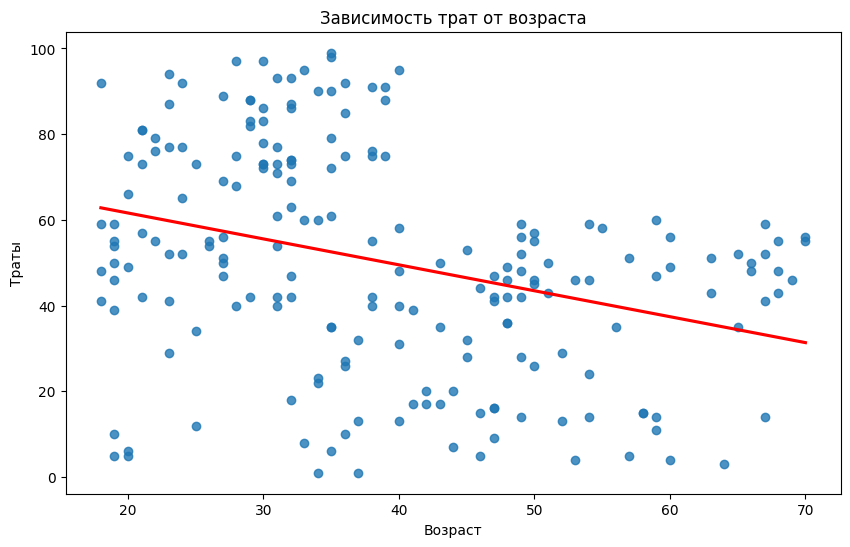

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='spendings', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Зависимость трат от возраста')
plt.xlabel('Возраст')
plt.ylabel('Траты')
plt.show()

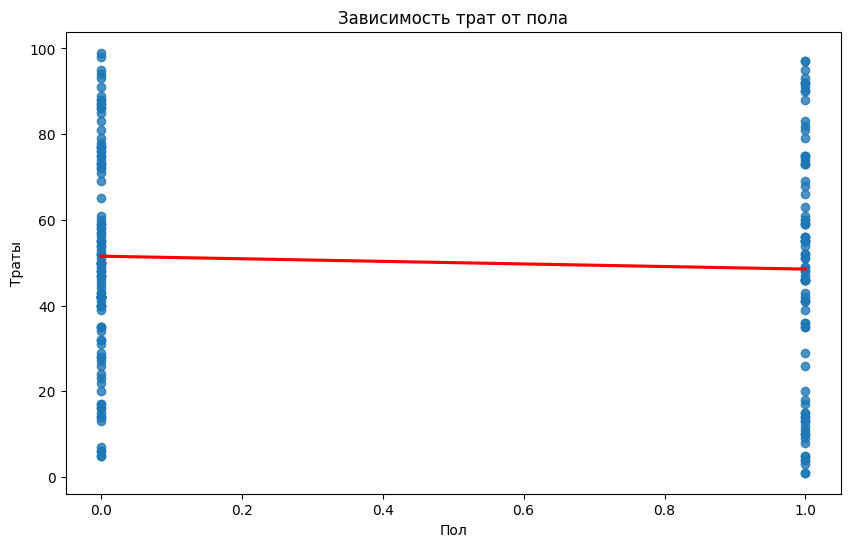

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='male', y='spendings', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Зависимость трат от пола')
plt.xlabel('Пол')
plt.ylabel('Траты')
plt.show()

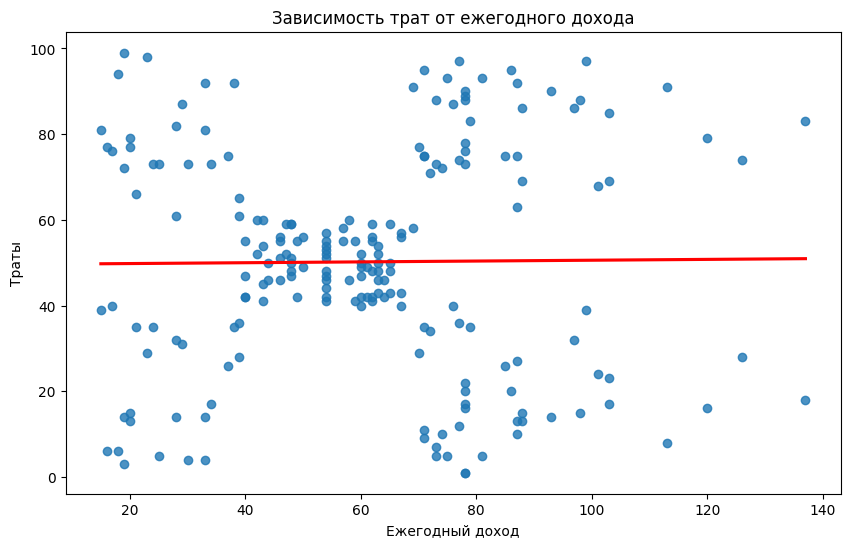

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='income', y='spendings', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Зависимость трат от ежегодного дохода')
plt.xlabel('Ежегодный доход')
plt.ylabel('Траты')
plt.show()

In [ ]:
X = data[['Age','male','income']]
y = data['spendings']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print("\nРезультаты регрессии:")
print(model.summary())


Результаты регрессии:
                            OLS Regression Results                            
Dep. Variable:              spendings   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     7.960
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           4.91e-05
Time:                        11:45:03   Log-Likelihood:                -922.05
No. Observations:                 200   AIC:                             1852.
Df Residuals:                     196   BIC:                             1865.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9300      6.

In [ ]:
est2 = sm.OLS(
    endog=data['spendings'],
    exog=sm.add_constant(data[['Age', 'male', 'income']])
    ).fit()

stargazer = Stargazer([est2])
stargazer

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='male', y='income', data=data, ci=None,line_kws={'color': 'red'})
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.title('Зависимость ежегодного дохода от пола')
plt.xlabel('Пол')
plt.ylabel('Ежегодный доход')
plt.show()

NameError: name 'plt' is not defined

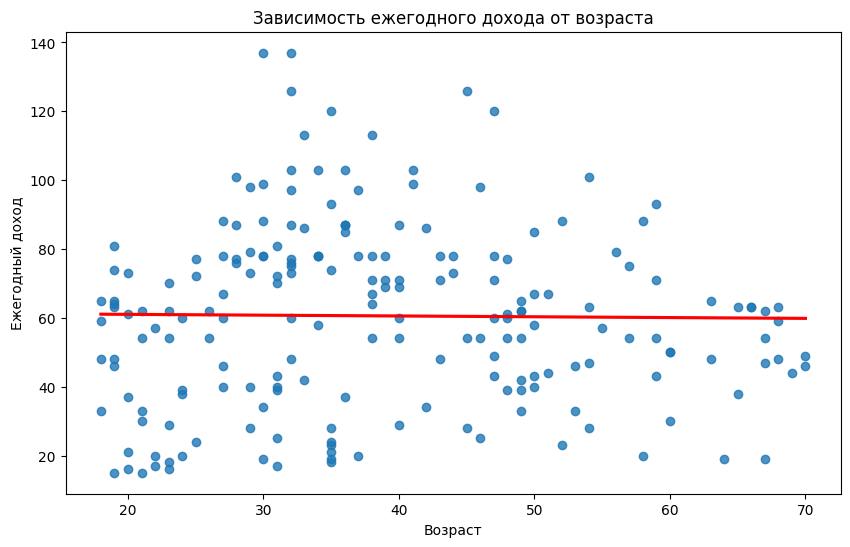

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='income', data=data, ci=None,line_kws={'color': 'red'})
plt.title('Зависимость ежегодного дохода от возраста')
plt.xlabel('Возраст')
plt.ylabel('Ежегодный доход')
plt.show()

In [ ]:
X = data[['male','Age']]
y = data['income']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print("\nРезультаты регрессии:")
print(model.summary())


Результаты регрессии:
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3394
Date:                Sun, 09 Jun 2024   Prob (F-statistic):              0.713
Time:                        11:47:25   Log-Likelihood:                -936.59
No. Observations:                 200   AIC:                             1879.
Df Residuals:                     197   BIC:                             1889.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.3883      5.

In [ ]:
est2 = sm.OLS(
    endog=data['income'],
    exog=sm.add_constant(data[['Age', 'male']])
    ).fit()

stargazer = Stargazer([est2])
stargazer